### Cargamos el df del Notebook anterior

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

# Creo una carpeta para mi práctica en el directorio raíz
!mkdir -p "/content/drive/My Drive/Práctica NLP Najli YE"

import pandas as pd
preds_df = pd.read_csv('/content/drive/My Drive/Práctica NLP Najli YE/preds.csv', sep=',', decimal='.')

Mounted at /content/drive


Chequeo que la importación haya ido bien:

In [2]:
preds_df.head()

,y_test,lr_test_pred,y_test_prob
0,0,1,0.679789
1,0,0,0.234200
2,1,1,0.972800
3,0,1,0.887585
4,1,1,0.841063


Creo los df que necesito para los gráficos

In [3]:
y_test = preds_df['y_test']
lr_test_predict = preds_df['lr_test_pred']
y_test_proba =  preds_df['y_test_prob']

Funciones útiles de la librería `sklearn`

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,  precision_recall_curve # Reporte

In [5]:
from sklearn.feature_selection import chi2 # Reporte

In [6]:
# Para pintar más bonita la matriz de confusión
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

Tengo una función que permite representar la matriz de confusión de una forma más gráfica.

In [7]:
# Para pintar más bonita la matriz de confusión
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

LogisticRegression Confussion matrix:


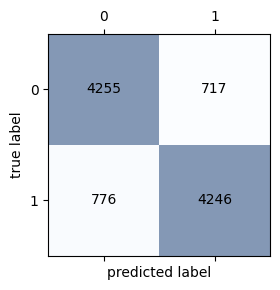

In [8]:
print('LogisticRegression Confussion matrix:')
plot_confusion_matrix(confusion_matrix(y_test, lr_test_predict))

Para medir la "bondad" del modelo, también es interesante representar la llamada curva *ROC*

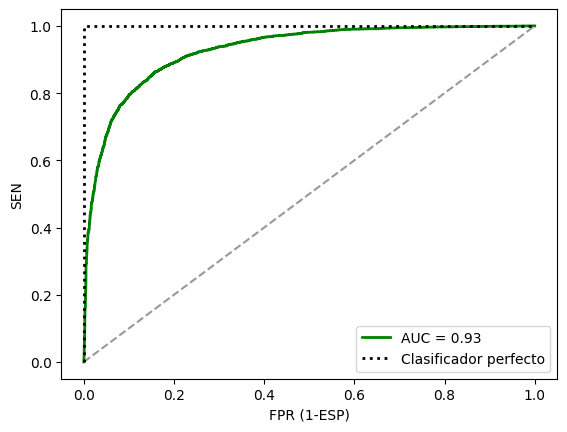

In [9]:
from sklearn.metrics import roc_curve, auc

ejex, ejey, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='green',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1], lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

También voy a representar en una gráfica las curvas de precisión y *recall*

In [10]:
p, r, thresholds = precision_recall_curve(y_test, lr_test_predict)

In [11]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

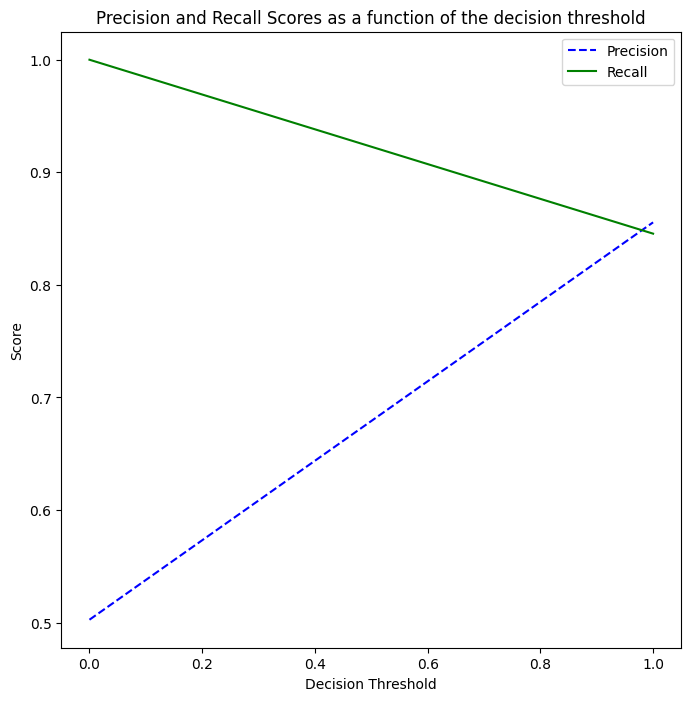

In [12]:
plot_precision_recall_vs_threshold(p, r, thresholds)

### Conclusiones de la Práctica de NLP


> La parte de **pre-procesamiento, tokenización y análisis es la más costosa** a nivel de tiempos de todo el proceso de Análisis de un Corpus.



> Muy importante señalar que he partido de un **dataset balanceado en ambas clases**, porque así lo quise definir yo, y que esto facilita la tarea y nos permite hacer uso de métricas como el *accuracy* que en problemas desbalanceados pierden todo el sentido.




> Viendo la matriz de confusión creo que he obtenido unos buenos resultados, con **alta tasa de predicción de True Positive y True Negative** e incluso con valores muy parecidos en los casos de Falso Positivo/Negativo.



> La curva ROC también muestra buena *performance*




> Considero que, siempre que sea posible, es **muy adecuado usar modelos lo más simples que se pueda**. En este caso, al tratarse de un problema de clasificación binaria (sentimiento positivo / sentimiento negativo) la Regresión Logística es un modelo sencillo y eficaz. Por supuesto que he probado otros modelos más avanzados pero, supongo que en parte por las características del dataset, no han dado tan buenos resultados.



> Para poder **aplicar correctamente un modelo de Deep Learning hay que invertir tiempo en el análisis y la optimización de hiperparámetros**. A pesar de no haber logrado grandes resultados, no quería dejar pasar la oportunidad de plantear el problema desde esa perspectiva.
Importante tener en cuenta que los datos no pueden tomarse y procesarse de la misma forma que se ha hecho con Machine Learning, ya que las redes neuronales procesan de otra manera.
Si tuviera más capacidad de procesamiento, hubiera mejorado los hiperparámetros de la Red Neuronal y la hubiera entrenado durante más épocas.














---

